In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools
import datetime
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv('Employee.csv')
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors  2017         Bangalore  3            34   Male    No           
1  Bachelors  2013         Pune       1            28   Female  No           
2  Bachelors  2014         New Delhi  3            38   Female  No           
3  Masters    2016         Bangalore  3            27   Male    No           
4  Masters    2017         Pune       3            24   Male    Yes          

   ExperienceInCurrentDomain  LeaveOrNot  
0  0                          0           
1  3                          1           
2  2                          0           
3  5                          1           
4  2                          1

In [3]:
df.dtypes

Education                    object
JoiningYear                  int64 
City                         object
PaymentTier                  int64 
Age                          int64 
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain    int64 
LeaveOrNot                   int64 
dtype: object

## EXPLORE DATA

In [4]:
# Display the shape
df.shape

(4653, 9)

In [5]:
# Display the first few rows of the dataset
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors  2017         Bangalore  3            34   Male    No           
1  Bachelors  2013         Pune       1            28   Female  No           
2  Bachelors  2014         New Delhi  3            38   Female  No           
3  Masters    2016         Bangalore  3            27   Male    No           
4  Masters    2017         Pune       3            24   Male    Yes          

   ExperienceInCurrentDomain  LeaveOrNot  
0  0                          0           
1  3                          1           
2  2                          0           
3  5                          1           
4  2                          1

In [6]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
# Summary statistics
df.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000  4653.000000                 
mean   2015.062970  2.698259     29.393295    2.905652                    
std    1.863377     0.561435     4.826087     1.558240                    
min    2012.000000  1.000000     22.000000    0.000000                    
25%    2013.000000  3.000000     26.000000    2.000000                    
50%    2015.000000  3.000000     28.000000    3.000000                    
75%    2017.000000  3.000000     32.000000    4.000000                    
max    2018.000000  3.000000     41.000000    7.000000                    

        LeaveOrNot  
count  4653.000000  
mean   0.343864     
std    0.475047     
min    0.000000     
25%    0.000000     
50%    0.000000     
75%    1.000000     
max    1.000000

In [8]:
# To check if there is any null values in the dataset
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## CLEAN DATA

In [9]:
# Drop rows with missing values
data = df.dropna()
data

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors  2017         Bangalore  3            34   Male    No           
1     Bachelors  2013         Pune       1            28   Female  No           
2     Bachelors  2014         New Delhi  3            38   Female  No           
3     Masters    2016         Bangalore  3            27   Male    No           
4     Masters    2017         Pune       3            24   Male    Yes          
...       ...     ...          ...      ..            ..    ...    ...          
4648  Bachelors  2013         Bangalore  3            26   Female  No           
4649  Masters    2013         Pune       2            37   Male    No           
4650  Masters    2018         New Delhi  3            27   Male    No           
4651  Bachelors  2012         Bangalore  3            30   Male    Yes          
4652  Bachelors  2015         Bangalore  3            33   Male    Yes          

      ExperienceInCurrentDomain  LeaveOrNot  
0     0                          0           
1     3                          1           
2     2                          0           
3     5                          1           
4     2                          1           
...  ..                         ..           
4648  4                          0           
4649  2                          1           
4650  5                          1           
4651  2                          0           
4652  4                          0           

[4653 rows x 9 columns]

In [10]:
# Remove duplicates
data = df.drop_duplicates()
data

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors  2017         Bangalore  3            34   Male    No           
1     Bachelors  2013         Pune       1            28   Female  No           
2     Bachelors  2014         New Delhi  3            38   Female  No           
3     Masters    2016         Bangalore  3            27   Male    No           
4     Masters    2017         Pune       3            24   Male    Yes          
...       ...     ...          ...      ..            ..    ...    ...          
4645  Masters    2017         Pune       2            31   Female  No           
4647  Bachelors  2016         Pune       3            30   Male    No           
4649  Masters    2013         Pune       2            37   Male    No           
4650  Masters    2018         New Delhi  3            27   Male    No           
4651  Bachelors  2012         Bangalore  3            30   Male    Yes          

      ExperienceInCurrentDomain  LeaveOrNot  
0     0                          0           
1     3                          1           
2     2                          0           
3     5                          1           
4     2                          1           
...  ..                         ..           
4645  2                          0           
4647  2                          0           
4649  2                          1           
4650  5                          1           
4651  2                          0           

[2764 rows x 9 columns]

## DATA VISUALIZATION

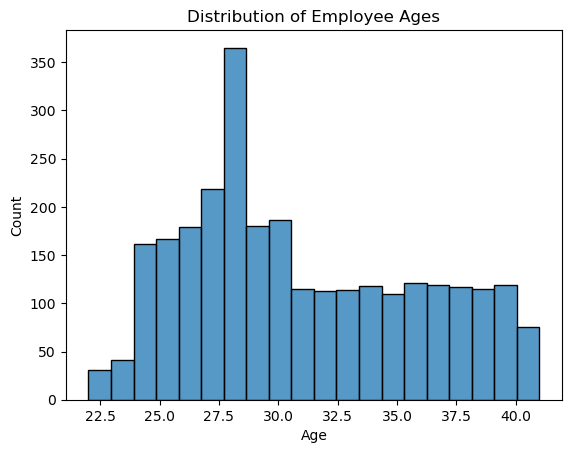

In [11]:
# Create a histogram of employee ages
sns.histplot(data['Age'], bins=20)
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


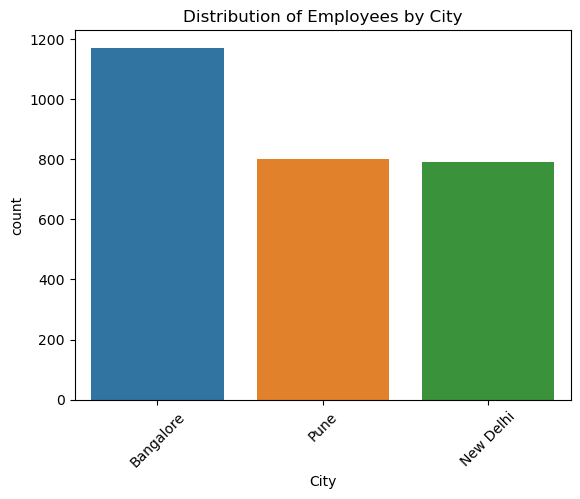

In [12]:
# Create a bar plot for a categorical feature
sns.countplot(x='City', data=data)
plt.title('Distribution of Employees by City')
plt.xticks(rotation=45)
plt.show()


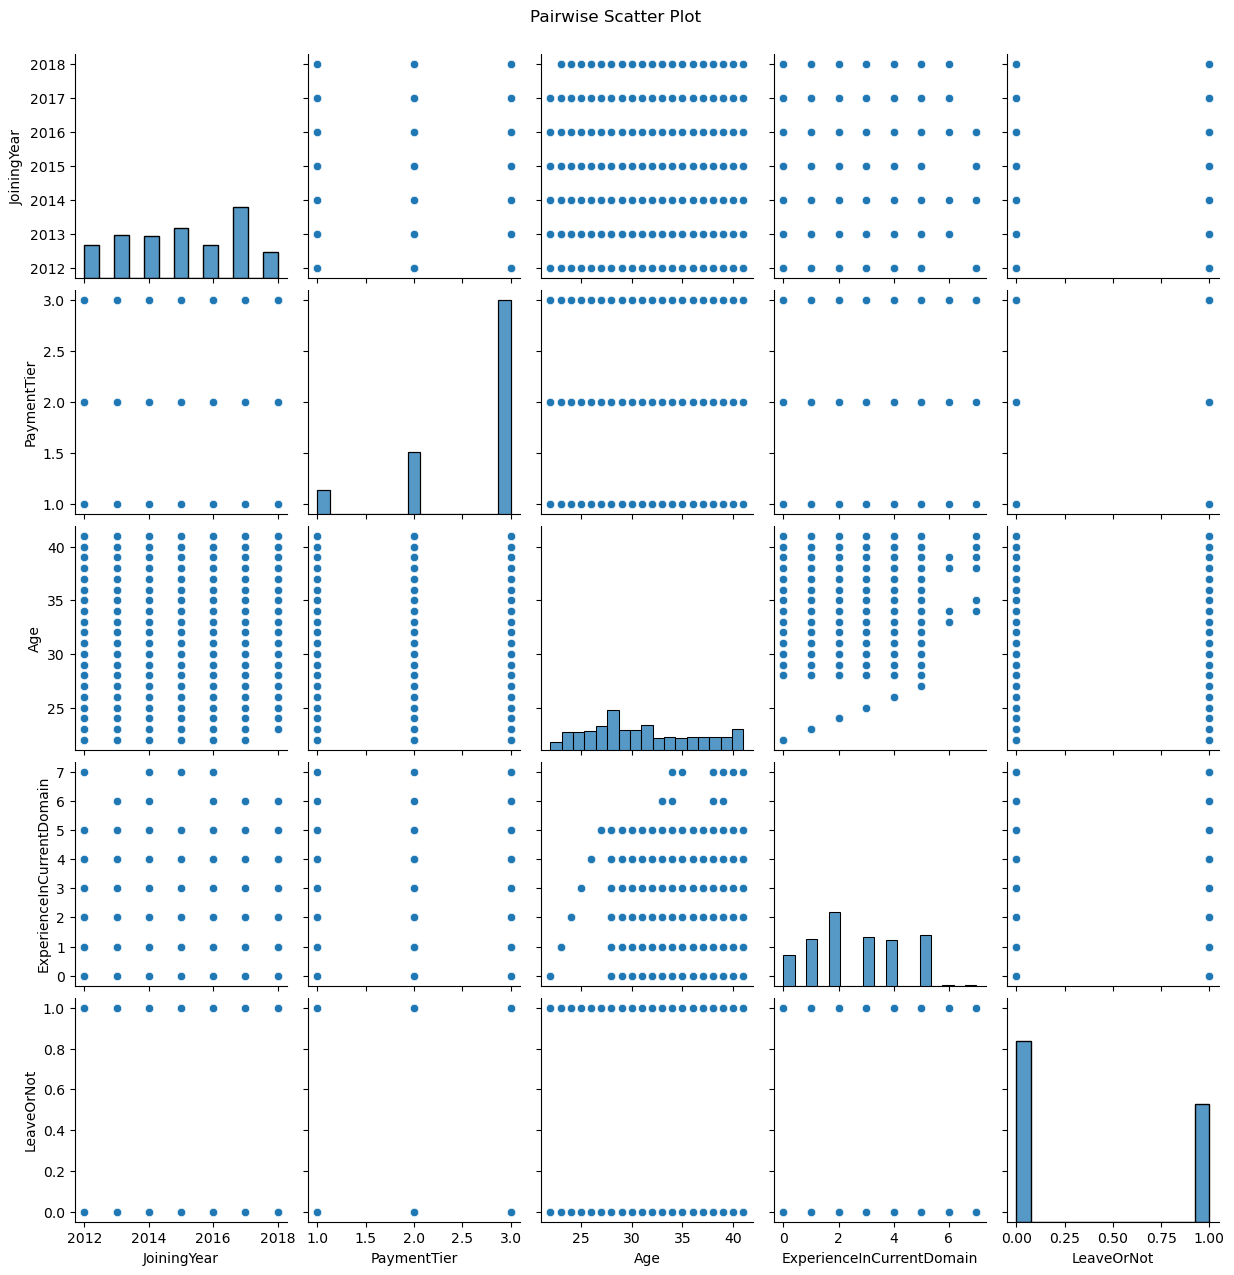

In [13]:
# Pairwise scatter plot for numeric features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

sns.pairplot(data=numerical_features)
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()


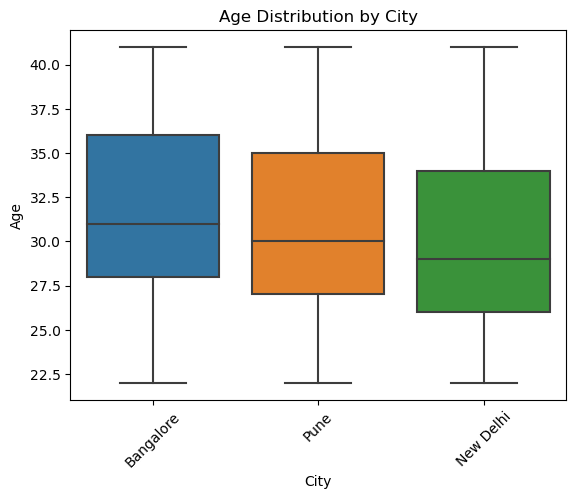

In [14]:
# Create a box plot for a numeric feature
sns.boxplot(x='City', y='Age', data=data)
plt.title('Age Distribution by City')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(data['City'], data['Gender'])
print(cross_tab)


Gender     Female  Male
City                   
Bangalore  428     743 
New Delhi  432     360 
Pune       375     426 


<AxesSubplot:xlabel='JoiningYear', ylabel='Percent'>

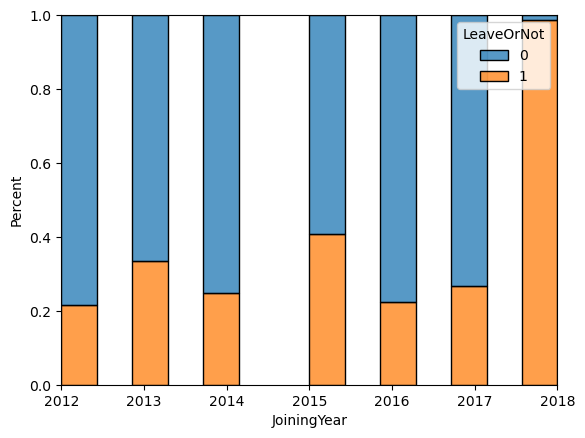

In [16]:
# Compare the distribution of joining years between employees who left and those who did not
sns.histplot(data=df, x=df["JoiningYear"], hue="LeaveOrNot", multiple='fill', stat="percent")

<AxesSubplot:xlabel='PaymentTier', ylabel='Percent'>

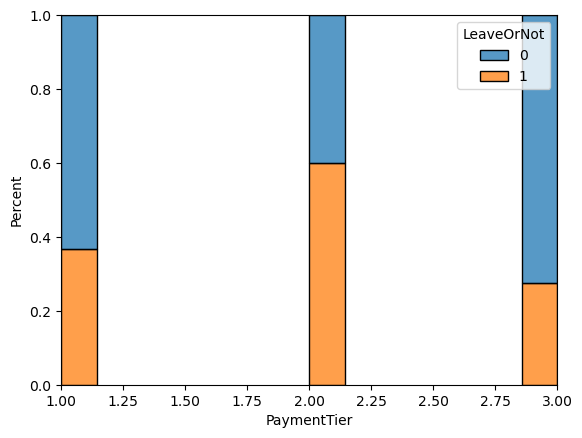

In [17]:
# compare the distribution of Payment Tier between employees who left and those who did not
sns.histplot(data=df, x=df["PaymentTier"], hue="LeaveOrNot", multiple='fill', stat="percent")

<AxesSubplot:xlabel='Age', ylabel='Count'>

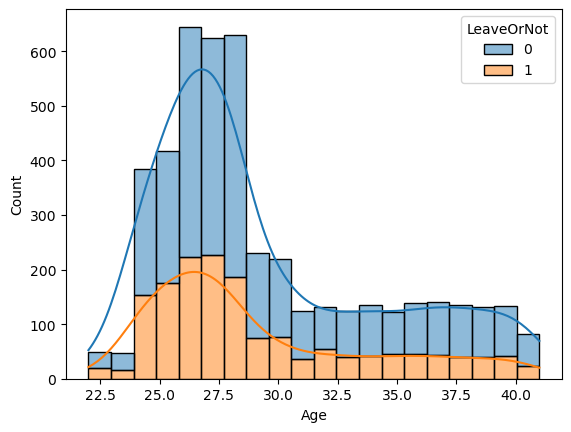

In [18]:
# compare the distribution of age between employees who left and those who did not
sns.histplot(data=df, x=df["Age"],hue="LeaveOrNot", kde=True, bins=20, multiple="stack")

## Exploratory Analysis


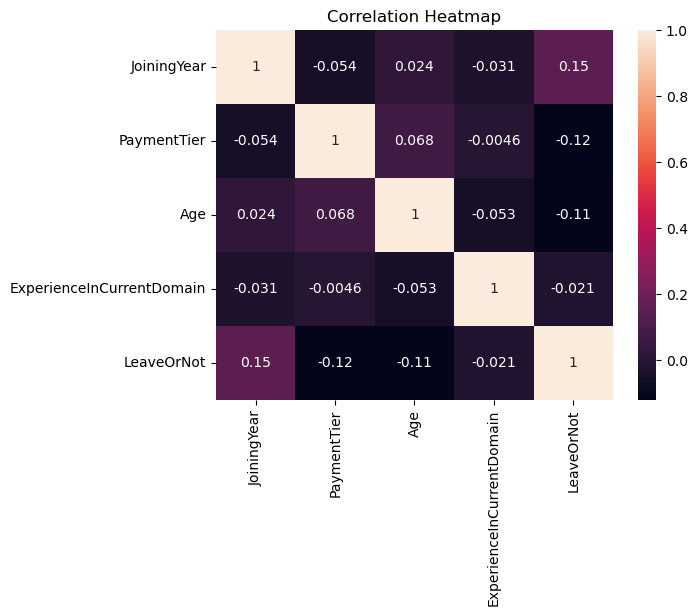

In [19]:
# Calculate and visualize correlations between numeric variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


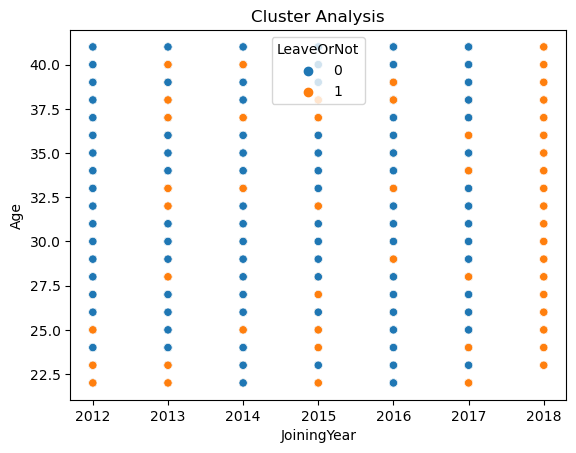

In [20]:
# How employees are distributed in the 'JoiningYear' vs. 'Age' space, with different colors indicating whether they left or not
from sklearn.cluster import KMeans
X_subset = df[['JoiningYear', 'Age', 'LeaveOrNot']]  
kmeans = KMeans(n_clusters=3)  
X_subset['Cluster'] = kmeans.fit_predict(X_subset)
sns.scatterplot(data=X_subset, x='JoiningYear', y='Age', hue='LeaveOrNot')
plt.title('Cluster Analysis')
plt.show()


# Label Encoding for Categorical Data


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_le = df.copy()
df_le["Education"]= le.fit_transform(df_le["Education"])
df_le["City"]=le.fit_transform(df_le["City"])
df_le["Gender"]=le.fit_transform(df_le["Gender"])
df_le["EverBenched"]=le.fit_transform(df_le["EverBenched"])

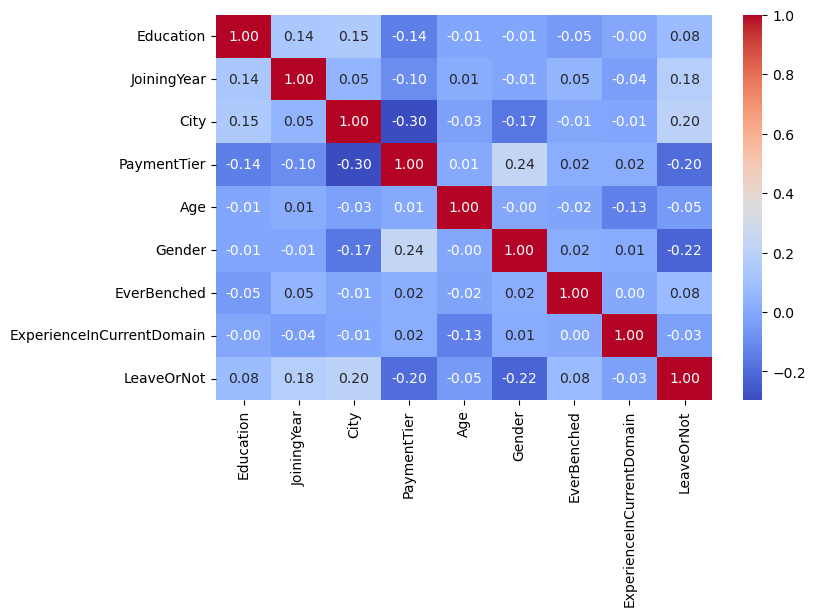

In [22]:
# Plot the correlation matrix 
plt.figure(figsize=(8,5))
sns.heatmap(df_le.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [23]:
# Separate features (X) and target (y)
X = df.drop(columns=['LeaveOrNot'])
y = df['LeaveOrNot']

In [24]:
# Define numerical and categorical column names
numerical_cols = X.select_dtypes(exclude='object').columns.to_list()
print(numerical_cols)
categorical_cols = X.select_dtypes(include='object').columns.to_list()
print(categorical_cols)

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
['Education', 'City', 'Gender', 'EverBenched']


## Statistical significance of the features

In [25]:
# Perform ANOVA for numerical columns
for col in numerical_cols:
    anova_result = stats.f_oneway(*[X[col][y == c] for c in y.unique()])
    print(f"ANOVA for {col}:")
    print("P-value:", anova_result.pvalue)
    if anova_result.pvalue < 0.05:
        print("Significant Feature")
    else:
        print("Non-significant feature")
    print("")
print('********************************************************')
# Perform Chi-Square tests for categorical columns
for col in categorical_cols:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}:")
    print("Chi2 statistic:", chi2)
    print("P-value:", p)
    if p < 0.05:
        print("Significant Feature")
    else:
        print("Non-significant feature")
    print("")

ANOVA for JoiningYear:
P-value: 7.901616664702911e-36
Significant Feature

ANOVA for PaymentTier:
P-value: 3.384266876818402e-42
Significant Feature

ANOVA for Age:
P-value: 0.0004852123420637579
Significant Feature

ANOVA for ExperienceInCurrentDomain:
P-value: 0.03746138354036463
Significant Feature

********************************************************
Chi-Square test for Education:
Chi2 statistic: 101.83014138498626
P-value: 7.724417739147332e-23
Significant Feature

Chi-Square test for City:
Chi2 statistic: 206.15885400194648
P-value: 1.7106992135618012e-45
Significant Feature

Chi-Square test for Gender:
Chi2 statistic: 225.6953561969211
P-value: 5.177873883438753e-51
Significant Feature

Chi-Square test for EverBenched:
Chi2 statistic: 28.086147926708364
P-value: 1.1603340647939294e-07
Significant Feature



##### We could see all the features are significant for the target

In [26]:
for i in categorical_cols:
    print(X[i].value_counts())

Bachelors    3601
Masters      873 
PHD          179 
Name: Education, dtype: int64
Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64
Male      2778
Female    1875
Name: Gender, dtype: int64
No     4175
Yes    478 
Name: EverBenched, dtype: int64


In [27]:
# Create transformers for preprocessing
#imputer is used suppose eventhough we dont have nulls in given data , but will be useful when we get nulls in real data
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='if_binary'))
])

In [28]:
# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
len(df)

4653

In [30]:
df['LeaveOrNot'].value_counts()/len(df)

0    0.656136
1    0.343864
Name: LeaveOrNot, dtype: float64

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234,stratify=y)

# Create a full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [32]:
y_train.value_counts()/len(y_train)

0    0.656099
1    0.343901
Name: LeaveOrNot, dtype: float64

In [33]:
y_test.value_counts()/len(y_test)

0    0.656284
1    0.343716
Name: LeaveOrNot, dtype: float64

In [34]:
pipeline.fit_transform(X_train)

array([[-0.57507408, -3.03861582,  1.5751245 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.03952918,  0.5313741 , -1.1205206 , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.03952918,  0.5313741 , -0.29109134, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.57507408,  0.5313741 ,  0.95305255, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.50132809,  0.5313741 ,  1.36776718, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50132809,  0.5313741 , -1.53523523, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
cat_cols = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

In [36]:
# Fit and transform the training data and keep it as a DataFrame
X_train_scaled = pd.DataFrame(pipeline.fit_transform(X_train), columns=numerical_cols + cat_cols)
X_train_scaled.index = X_train.index
# Transform the test data and keep it as a DataFrame
X_test_scaled = pd.DataFrame(pipeline.transform(X_test), columns=numerical_cols + cat_cols)
X_test_scaled.index = X_test.index

In [37]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

In [38]:
print('Train features :',X_train.shape)
print('Train labels :',y_train.shape)
print('Test features :',X_test.shape)
print('Test labels :',y_test.shape)

Train features : (3722, 12)
Train labels : (3722,)
Test features : (931, 12)
Test labels : (931,)


In [39]:
final_scores = pd.DataFrame(columns=['Model Name','no of features','Features','AUC','Precision','Recall','Accuracy','F1 score'])
final_scores

Empty DataFrame
Columns: [Model Name, no of features, Features, AUC, Precision, Recall, Accuracy, F1 score]
Index: []

In [40]:
def metrics_calculation(y_test,predictions):
    metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
    }
    return metrics

In [41]:
## Below code used for peers to work on individual models so commented after use

## Logistic Regression

In [42]:
y_train.value_counts()

0    2442
1    1280
Name: LeaveOrNot, dtype: int64

In [43]:
columns = X_train.columns

In [44]:
columns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'Gender_Male',
       'EverBenched_Yes'],
      dtype='object')

### Baseline Logistic Regression model

In [45]:
lr_base_model = LogisticRegression()
lr_base_model.fit(X_train,y_train)
y_pred_lr_base_model = lr_base_model.predict(X_test)

In [46]:
metrics = metrics_calculation(y_test, y_pred_lr_base_model)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.67
Recall: 0.42
AUC: 0.66
F1 Score: 0.52
Accuracy: 0.73


In [47]:
confusion_matrix(y_test, y_pred_lr_base_model)

array([[543,  68],
       [184, 136]], dtype=int64)

### GridSearchCV

In [48]:
logisticRegr = LogisticRegression()

In [49]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2',None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [50]:
grid_search = GridSearchCV(logisticRegr, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [51]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params,best_score)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'} 0.7320390565415578


In [52]:
logisticRegr = LogisticRegression()

In [53]:
logisticRegr.set_params(**best_params)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [54]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

<AxesSubplot:ylabel='Feature'>

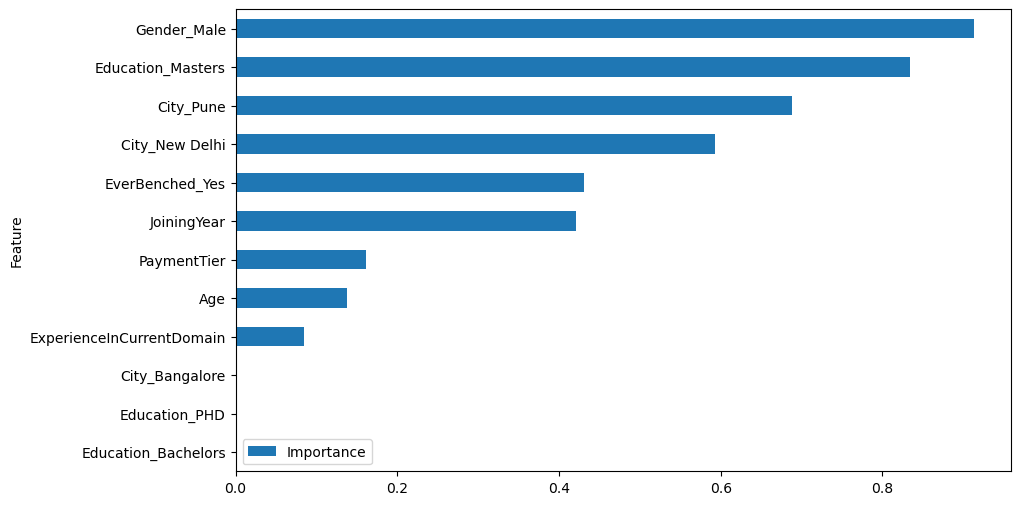

In [55]:
coefficients = logisticRegr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [56]:
feature_importance[feature_importance['Importance'] < 0.1]['Feature'].to_list()

['Education_Bachelors',
 'Education_PHD',
 'City_Bangalore',
 'ExperienceInCurrentDomain']

In [57]:
# predicting the output for the test dataset
predictions = logisticRegr.predict(X_test)

In [58]:
accuracy_score(y_test,predictions)

0.7303974221267454

In [59]:
report = classification_report(y_test, predictions)

# Print the report
print(report)

confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       611
           1       0.67      0.42      0.52       320

    accuracy                           0.73       931
   macro avg       0.71      0.66      0.67       931
weighted avg       0.72      0.73      0.71       931



array([[544,  67],
       [184, 136]], dtype=int64)

In [60]:
metrics = metrics_calculation(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.67
Recall: 0.42
AUC: 0.66
F1 Score: 0.52
Accuracy: 0.73


### Dropping Features based on importance

In [61]:
#based on feature importance , we are going to drop 3 least importance features
feature_to_drop = feature_importance[feature_importance['Importance'] < 0.1]['Feature'].to_list()
X_train_new = X_train.drop(feature_to_drop,axis=1)
X_test_new  = X_test.drop(feature_to_drop,axis=1)

In [62]:
param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000],
    'penalty': ['l1', 'l2','elasticnet',None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100,500,1000]
}

In [63]:
grid_search = GridSearchCV(logisticRegr, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1', solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [64]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params,best_score)

{'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'} 0.7317372352487302


In [65]:
logisticRegr_final = LogisticRegression()

In [66]:
logisticRegr_final.set_params(**best_params)

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

In [67]:
logisticRegr_final.fit(X_train_new, y_train)

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

<AxesSubplot:ylabel='Feature'>

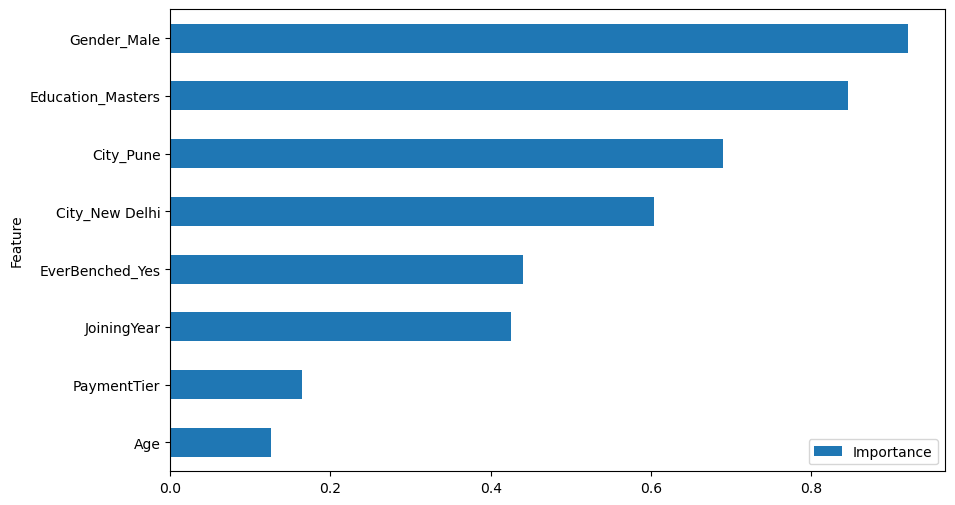

In [68]:
coefficients = logisticRegr_final.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [69]:
# predicting the output for the test dataset
predictions = logisticRegr_final.predict(X_test_new)

In [70]:
accuracy_score(y_test,predictions)

0.7368421052631579

In [71]:
report = classification_report(y_test, predictions)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       611
           1       0.68      0.43      0.53       320

    accuracy                           0.74       931
   macro avg       0.72      0.66      0.67       931
weighted avg       0.73      0.74      0.72       931



In [72]:
confusion_matrix(y_test,predictions)

array([[547,  64],
       [181, 139]], dtype=int64)

In [73]:
metrics = metrics_calculation(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.68
Recall: 0.43
AUC: 0.66
F1 Score: 0.53
Accuracy: 0.74


In [74]:
metrics

{'Precision': 0.6847290640394089,
 'Recall': 0.434375,
 'AUC': 0.6648143412438625,
 'F1 Score': 0.531548757170172,
 'Accuracy': 0.7368421052631579}

In [75]:
final_scores.loc[len(final_scores)] = ['Logistic Regression',len(X_train_new.columns.to_list()),X_train_new.columns.to_list(),metrics['AUC'],metrics['Precision'],metrics['Recall'],metrics['Accuracy'],metrics['F1 Score']]

In [76]:
final_scores

Model Name  no of features  \
0  Logistic Regression  8                

                                                                                                      Features  \
0  [JoiningYear, PaymentTier, Age, Education_Masters, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   

        AUC  Precision    Recall  Accuracy  F1 score  
0  0.664814  0.684729   0.434375  0.736842  0.531549

# Decision Tree Classifier

In [77]:
X_train.shape, y_train.shape

((3722, 12), (3722,))

In [78]:
X_test.shape, y_test.shape

((931, 12), (931,))

### Baseline Decision Tree model

In [79]:
dtc_model = DecisionTreeClassifier(random_state=1234)
dtc_model.fit(X_train,y_train)
y_pred_dtc_model = dtc_model.predict(X_test)

In [80]:
metrics = {
    'Precision': precision_score(y_test, y_pred_dtc_model),
    'Recall': recall_score(y_test, y_pred_dtc_model),
    'AUC': roc_auc_score(y_test, y_pred_dtc_model),
    'F1 Score': f1_score(y_test, y_pred_dtc_model),
    'Accuracy': accuracy_score(y_test, y_pred_dtc_model)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.78
Recall: 0.72
AUC: 0.80
F1 Score: 0.75
Accuracy: 0.83


In [81]:
confusion_matrix(y_test, y_pred_dtc_model)

array([[546,  65],
       [ 91, 229]], dtype=int64)

### GridsearchCV Decision Tree model

In [82]:
dtc_model = DecisionTreeClassifier(random_state=1234)

In [83]:
param_grid = {"criterion" : ["gini", "entropy"], "max_depth": [2,4,10],"max_features":[None,'auto','sqrt','log2',5]}

In [84]:
cv = GridSearchCV(dtc_model, param_grid= param_grid,cv=5,scoring='roc_auc')

In [85]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2', 5]},
             scoring='roc_auc')

In [86]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None}

In [87]:
pd.DataFrame(cv.cv_results_)[["param_criterion","param_max_depth","params", "mean_test_score", "rank_test_score"]].sort_values(by ='rank_test_score')

param_criterion param_max_depth  \
25  entropy         10               
10  gini            10               
29  entropy         10               
27  entropy         10               
26  entropy         10               
28  entropy         10               
14  gini            10               
5   gini            4                
20  entropy         4                
11  gini            10               
12  gini            10               
13  gini            10               
24  entropy         4                
9   gini            4                
0   gini            2                
15  entropy         2                
23  entropy         4                
22  entropy         4                
21  entropy         4                
7   gini            4                
6   gini            4                
8   gini            4                
17  entropy         2                
16  entropy         2                
3   gini            2                
2   gini            2                
1   gini            2                
18  entropy         2                
4   gini            2                
19  entropy         2                

                                                               params  \
25  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None}     
10  {'criterion': 'gini', 'max_depth': 10, 'max_features': None}        
29  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5}        
27  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}   
26  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}   
28  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}   
14  {'criterion': 'gini', 'max_depth': 10, 'max_features': 5}           
5   {'criterion': 'gini', 'max_depth': 4, 'max_features': None}         
20  {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}      
11  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}      
12  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}      
13  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}      
24  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 5}         
9   {'criterion': 'gini', 'max_depth': 4, 'max_features': 5}            
0   {'criterion': 'gini', 'max_depth': 2, 'max_features': None}         
15  {'criterion': 'entropy', 'max_depth': 2, 'max_features': None}      
23  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}    
22  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt'}    
21  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}    
7   {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}       
6   {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}       
8   {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}       
17  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt'}    
16  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}    
3   {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}       
2   {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}       
1   {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}       
18  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2'}    
4   {'criterion': 'gini', 'max_depth': 2, 'max_features': 5}            
19  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 5}         

    mean_test_score  rank_test_score  
25  0.834517         1                
10  0.829544         2                
29  0.826883         3                
27  0.825831         4                
26  0.825831         4                
28  0.825831         4                
14  0.821886         7                
5   0.818216         8                
20  0.817305         9                
11  0.804298         10               
12  0.804298         10               
13  0.804298         10               
24  0.804215         13               
9   0.804215  

##### It can be seen that with this dataset, criterion hyperparameter almost didn't affect the results. 
##### But the max depth of the tree takes very important role on the accuracy score.


In [88]:
#Testing the model
predictions = cv.predict(X_test)

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       611
           1       0.84      0.71      0.77       320

    accuracy                           0.85       931
   macro avg       0.85      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



In [90]:
confusion_matrix(y_test, predictions)

array([[569,  42],
       [ 93, 227]], dtype=int64)

In [91]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.84
Recall: 0.71
AUC: 0.82
F1 Score: 0.77
Accuracy: 0.85


##### Our model also performed well in test scenario. The reason why we got lower recall score on "1" labeled samples is that there are low amount of samples which labeled as "1" (unbalanced dataset).

### Creating the model again with the removal of some features.

In [92]:
#Pearson Correlation Function
def cor_selector(X, y,num_feats):
    feature_name = X.columns.tolist()

    cor_feature = abs(pd.DataFrame.corrwith(X,y)).sort_values(ascending= False).head(num_feats)
    cor_feature = cor_feature.index.tolist()
    
    return  cor_feature

In [93]:
metrics = pd.DataFrame(columns = X_train.columns.tolist() + ['Feature_Count','Train_Accuracy', 'Test_Accuracy'])

for i in range(1, len(X_train.columns)):
    features = cor_selector(X_train, y_train, i) #i = number of features to be selected 
    new_X_train = X_train[features]
    new_X_test = X_test[features]
    cv.fit(new_X_train, y_train)
    
    my_dict = {} #Creating a dictionary to add rows into metrics dataframe.
    for item in features:
        my_dict[item] = 1
    predictions = cv.predict(new_X_test)
    my_dict['Test_Accuracy'] = accuracy_score(y_test, predictions)
    my_dict['Train_Accuracy'] = cv.best_score_
    my_dict['Feature_Count'] = len(features)
    metrics.loc[len(metrics)] = my_dict
    #With the code above, we will able to see the selected features and the accuracy scores on the metrics dataframe.

In [94]:
metrics = metrics.fillna(0)
metrics.sort_values('Train_Accuracy',ascending=False)

JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
6   1.0          1.0          0.0  0.0                         
5   1.0          1.0          0.0  0.0                         
7   1.0          1.0          0.0  0.0                         
4   1.0          1.0          0.0  0.0                         
10  1.0          1.0          1.0  1.0                         
8   1.0          1.0          1.0  0.0                         
9   1.0          1.0          1.0  1.0                         
3   1.0          1.0          0.0  0.0                         
2   1.0          0.0          0.0  0.0                         
1   0.0          0.0          0.0  0.0                         
0   0.0          0.0          0.0  0.0                         

    Education_Bachelors  Education_Masters  Education_PHD  City_Bangalore  \
6   1.0                  1.0                0.0            1.0              
5   0.0                  1.0                0.0            1.0              
7   1.0                  1.0                0.0            1.0              
4   0.0                  1.0                0.0            0.0              
10  1.0                  1.0                1.0            1.0              
8   1.0                  1.0                0.0            1.0              
9   1.0                  1.0                0.0            1.0              
3   0.0                  0.0                0.0            0.0              
2   0.0                  0.0                0.0            0.0              
1   0.0                  0.0                0.0            0.0              
0   0.0                  0.0                0.0            0.0              

    City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  Feature_Count  \
6   0.0             1.0        1            0.0              7               
5   0.0             1.0        1            0.0              6               
7   0.0             1.0        1            1.0              8               
4   0.0             1.0        1            0.0              5               
10  0.0             1.0        1            1.0              11              
8   0.0             1.0        1            1.0              9               
9   0.0             1.0        1            1.0              10              
3   0.0             1.0        1            0.0              4               
2   0.0             1.0        1            0.0              3               
1   0.0             1.0        1            0.0              2               
0   0.0             0.0        1            0.0              1               

    Train_Accuracy  Test_Accuracy  
6   0.842573        0.858217       
5   0.840886        0.850698       
7   0.838580        0.858217       
4   0.836927        0.858217       
10  0.835036        0.857143       
8   0.834211        0.858217       
9   0.833990        0.856069       
3   0.797809        0.825994       
2   0.765631        0.817401       
1   0.655760        0.747583       
0   0.608967        0.656284

#### As a result, the model performs well all the way down to the 3 features which are "City_Pune, JoiningYear, Gender_Male"

### Model with 3 features

In [95]:
X_train_3feats = X_train[["City_Pune", "JoiningYear", "Gender_Male"]]
X_test_3feats = X_test[["City_Pune", "JoiningYear", "Gender_Male"]]

In [96]:
cv.fit(X_train_3feats, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2', 5]},
             scoring='roc_auc')

In [97]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': None}

In [98]:
predictions_3feats = cv.predict(X_test_3feats) 

In [99]:
print(classification_report(y_test, predictions_3feats))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       611
           1       0.89      0.54      0.67       320

    accuracy                           0.82       931
   macro avg       0.84      0.75      0.77       931
weighted avg       0.83      0.82      0.80       931



In [100]:
confusion_matrix(y_test, predictions_3feats)

array([[589,  22],
       [148, 172]], dtype=int64)

#### After reducing the number of features, the model began to produce more false positives. While it still maintains good accuracy for samples labeled as '0,' since we are attempting to predict employees who plan to leave the company, we are going to select features based on AUC

In [101]:
metrics = pd.DataFrame(columns = X_train.columns.tolist() + ['Feature_Count','Train_auc', 'Test_auc','avg_auc'])

for i in range(1, len(X_train.columns)):
    features = cor_selector(X_train, y_train, i) #i = number of features to be selected 
    new_X_train = X_train[features]
    new_X_test = X_test[features]
    cv.fit(new_X_train, y_train)
    
    my_dict = {} #Creating a dictionary to add rows into metrics dataframe.
    for item in features:
        my_dict[item] = 1
    predictions = cv.predict(new_X_test)
    my_dict['Test_auc'] = roc_auc_score(y_test, predictions)
    my_dict['Train_auc'] = cv.best_score_
    my_dict['avg_auc'] = (roc_auc_score(y_test, predictions)+cv.best_score_)/2
    my_dict['Feature_Count'] = len(features)
    metrics.loc[len(metrics)] = my_dict
    #With the code above, we will able to see the selected features and the auc scores on the metrics dataframe.

In [102]:
metrics = metrics.fillna(0)
metrics.sort_values('avg_auc',ascending=False,inplace=True)
metrics

JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
10  1.0          1.0          1.0  1.0                         
9   1.0          1.0          1.0  1.0                         
6   1.0          1.0          0.0  0.0                         
7   1.0          1.0          0.0  0.0                         
8   1.0          1.0          1.0  0.0                         
4   1.0          1.0          0.0  0.0                         
5   1.0          1.0          0.0  0.0                         
3   1.0          1.0          0.0  0.0                         
2   1.0          0.0          0.0  0.0                         
1   0.0          0.0          0.0  0.0                         
0   0.0          0.0          0.0  0.0                         

    Education_Bachelors  Education_Masters  Education_PHD  City_Bangalore  \
10  1.0                  1.0                1.0            1.0              
9   1.0                  1.0                0.0            1.0              
6   1.0                  1.0                0.0            1.0              
7   1.0                  1.0                0.0            1.0              
8   1.0                  1.0                0.0            1.0              
4   0.0                  1.0                0.0            0.0              
5   0.0                  1.0                0.0            1.0              
3   0.0                  0.0                0.0            0.0              
2   0.0                  0.0                0.0            0.0              
1   0.0                  0.0                0.0            0.0              
0   0.0                  0.0                0.0            0.0              

    City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  Feature_Count  \
10  0.0             1.0        1            1.0              11              
9   0.0             1.0        1            1.0              10              
6   0.0             1.0        1            0.0              7               
7   0.0             1.0        1            1.0              8               
8   0.0             1.0        1            1.0              9               
4   0.0             1.0        1            0.0              5               
5   0.0             1.0        1            0.0              6               
3   0.0             1.0        1            0.0              4               
2   0.0             1.0        1            0.0              3               
1   0.0             1.0        1            0.0              2               
0   0.0             0.0        1            0.0              1               

    Train_auc  Test_auc   avg_auc  
10  0.835036   0.824187  0.829611  
9   0.833990   0.822624  0.828307  
6   0.842573   0.810122  0.826347  
7   0.838580   0.809378  0.823979  
8   0.834211   0.813098  0.823655  
4   0.836927   0.805657  0.821292  
5   0.840886   0.799928  0.820407  
3   0.797809   0.767712  0.782760  
2   0.765631   0.750747  0.758189  
1   0.655760   0.649184  0.652472  
0   0.608967   0.500000  0.554484

In [103]:
top_one = metrics.head(1)
top_one

JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
10  1.0          1.0          1.0  1.0                         

    Education_Bachelors  Education_Masters  Education_PHD  City_Bangalore  \
10  1.0                  1.0                1.0            1.0              

    City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  Feature_Count  \
10  0.0             1.0        1            1.0              11              

    Train_auc  Test_auc   avg_auc  
10  0.835036   0.824187  0.829611

In [104]:
Top_features_dt = top_one.columns[top_one.iloc[0] == 1]
Top_features_dt

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_Pune', 'Gender_Male', 'EverBenched_Yes'],
      dtype='object')

### Grid Search on Reduced features

In [105]:
X_train_final_dt = X_train[Top_features_dt]
X_test_final_dt = X_test[Top_features_dt]

In [106]:
dtc_model = DecisionTreeClassifier(random_state=1234)

In [107]:
param_grid = {"criterion" : ["gini", "entropy"], "max_depth": [2,4,6,8,10,12],"max_features":[None,'auto','sqrt','log2',5,7,10]}

In [108]:
cv = GridSearchCV(dtc_model, param_grid= param_grid,cv=5,scoring='roc_auc')

In [109]:
cv.fit(X_train_final_dt, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [None, 'auto', 'sqrt', 'log2', 5, 7,
                                          10]},
             scoring='roc_auc')

In [110]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 10}

In [111]:
best_params = cv.best_params_
best_score = cv.best_score_
print(best_params,best_score)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 10} 0.8588429994981812


### Final Model for Decision Tree

In [112]:
dtc_model_final = DecisionTreeClassifier(random_state=1234)

In [113]:
dtc_model_final.set_params(**best_params)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=10,
                       random_state=1234)

In [114]:
dtc_model_final.fit(X_train_final_dt, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=10,
                       random_state=1234)

In [115]:
#Testing the model
predictions = dtc_model_final.predict(X_test_final_dt)

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       611
           1       0.85      0.70      0.77       320

    accuracy                           0.85       931
   macro avg       0.85      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



In [117]:
confusion_matrix(y_test, predictions)

array([[570,  41],
       [ 95, 225]], dtype=int64)

In [118]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.85
Recall: 0.70
AUC: 0.82
F1 Score: 0.77
Accuracy: 0.85


In [119]:
final_scores.loc[len(final_scores)] = ['Decision Tree',len(X_train_final_dt.columns.to_list()),X_train_final_dt.columns.to_list(),metrics['AUC'],metrics['Precision'],metrics['Recall'],metrics['Accuracy'],metrics['F1 Score']]

<AxesSubplot:ylabel='Feature'>

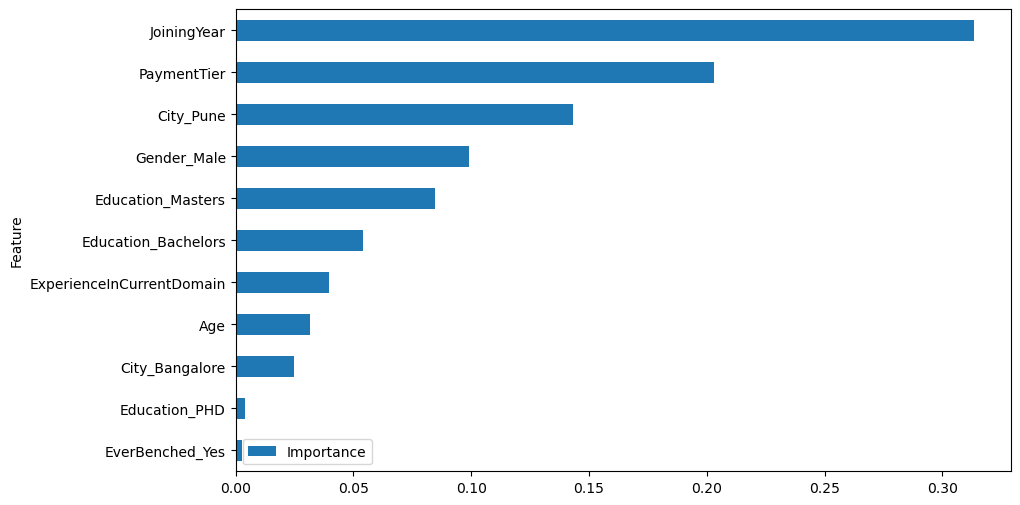

In [120]:
coefficients = dtc_model_final.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train_final_dt.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

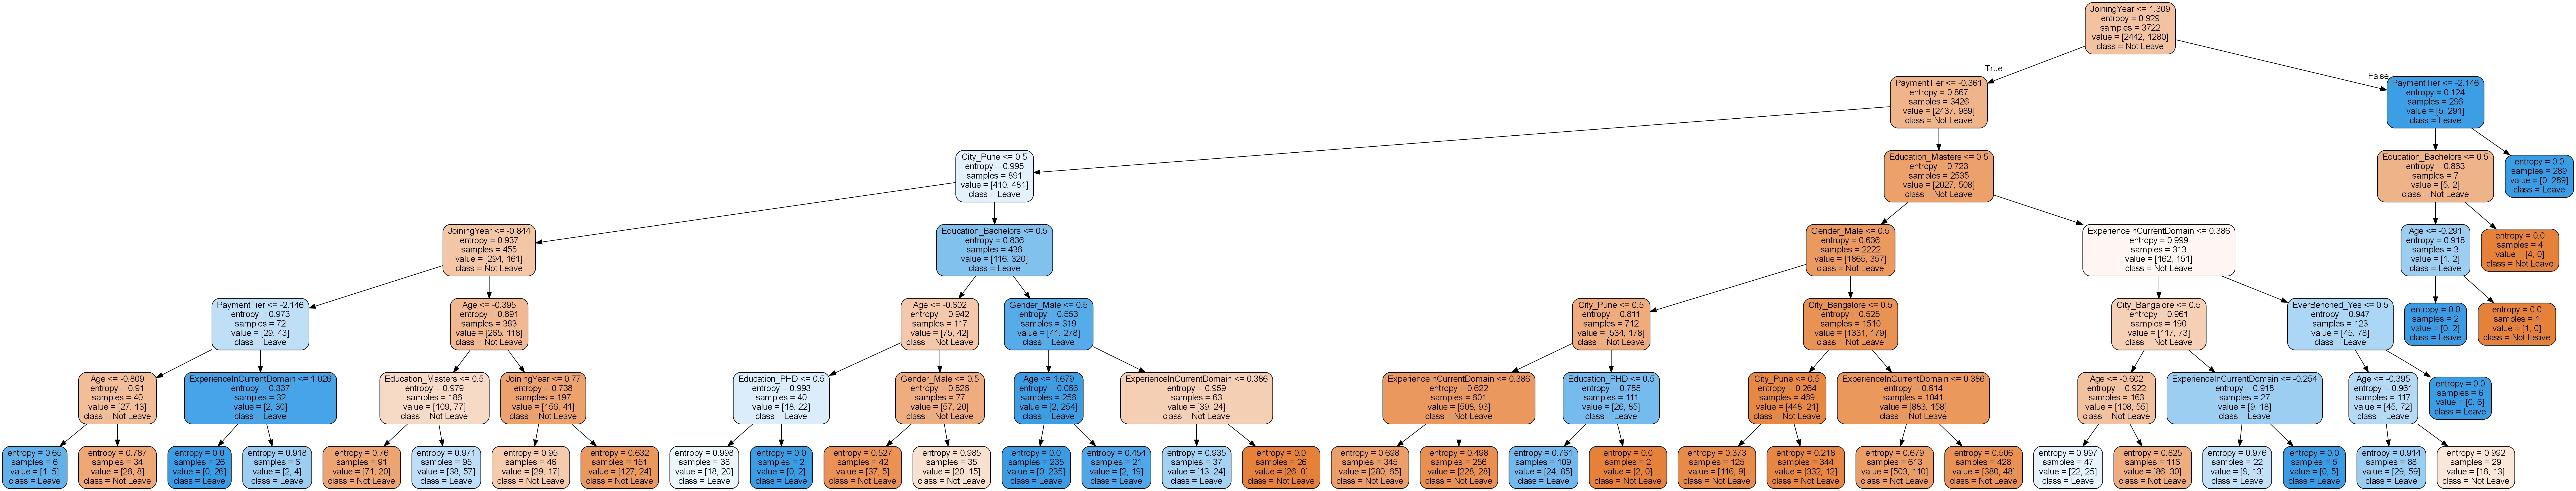

In [121]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


# Export a tree from the forest
export_graphviz(dtc_model_final, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=X_train_final_dt.columns, max_depth = 8, 
                class_names = ['Not Leave', 'Leave'], filled = True)

call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

In [122]:
final_scores

Model Name  no of features  \
0  Logistic Regression  8                
1  Decision Tree        11               

                                                                                                                                                                     Features  \
0  [JoiningYear, PaymentTier, Age, Education_Masters, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]                                                                  
1  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_Pune, Gender_Male, EverBenched_Yes]   

        AUC  Precision    Recall  Accuracy  F1 score  
0  0.664814  0.684729   0.434375  0.736842  0.531549  
1  0.818011  0.845865   0.703125  0.853921  0.767918

# SVM Classifier
### Creating a baseline SVM 

In [123]:
svm_model = SVC(kernel='linear',C=1,class_weight='balanced')
svm_model.fit(X_train,y_train)
y_pred_svm_model = svm_model.predict(X_test)

In [124]:
confusion_matrix(y_test, y_pred_svm_model)

array([[453, 158],
       [104, 216]], dtype=int64)

In [125]:
metrics = metrics_calculation(y_test,y_pred_svm_model)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.58
Recall: 0.68
AUC: 0.71
F1 Score: 0.62
Accuracy: 0.72


In [126]:
def plot_roc_auc(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    print("AUC (Area Under the Curve): {:.2f}".format(roc_auc))

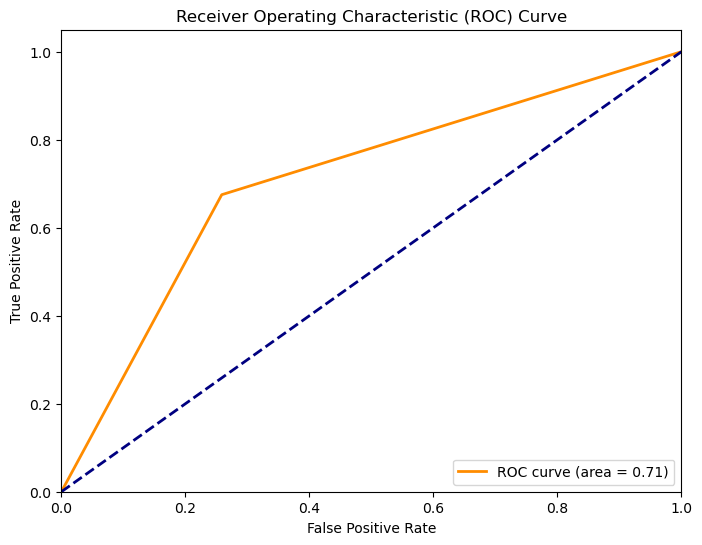

AUC (Area Under the Curve): 0.71


In [127]:
plot_roc_auc(y_test, y_pred_svm_model)

### Model predicted by GridSearchCV (all features)

In [128]:
start_time = datetime.datetime.now()

In [129]:
#We have tried 'poly' kernel but it was not selected as best param, so we removed it for future runs
grid_search_svm_model=SVC()
param_grid = {
    'kernel':['linear','rbf'] , 
    'C': [1,2,3,4,5], 
    'gamma':[0.1,0.3,0.7,0.9,1],
    'class_weight':['balanced']
}

grid_search_svm = GridSearchCV(estimator=grid_search_svm_model, param_grid=param_grid, cv=3, scoring='roc_auc',verbose=1)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_estimator_svm = grid_search_svm.best_estimator_

y_pred_grid_search_svm = best_estimator_svm.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [130]:
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time}")

Time taken: 0:03:12.138303


In [131]:
best_params_grid_search_svm = grid_search_svm.best_params_
best_score_grid_search_svm = grid_search_svm.best_score_
print(best_params_grid_search_svm,best_score_grid_search_svm)

{'C': 2, 'class_weight': 'balanced', 'gamma': 0.3, 'kernel': 'rbf'} 0.8383209034328868


In [132]:
confusion_matrix(y_test, y_pred_grid_search_svm)

array([[552,  59],
       [ 76, 244]], dtype=int64)

In [133]:
metrics = metrics_calculation(y_test,y_pred_grid_search_svm)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.81
Recall: 0.76
AUC: 0.83
F1 Score: 0.78
Accuracy: 0.85


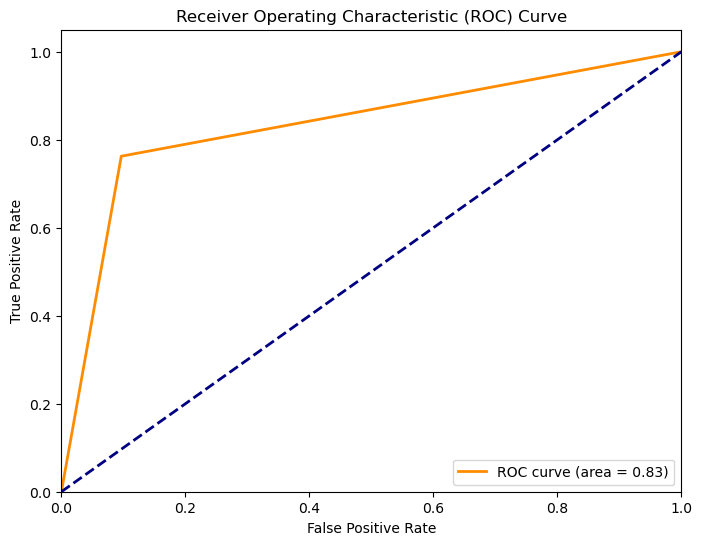

AUC (Area Under the Curve): 0.83


In [134]:
plot_roc_auc(y_test, y_pred_grid_search_svm)

### Using correlation matrix to identify featrures to be removed

In [135]:
train_data = X_train.copy()
train_data['Target'] = y_train
train_data.head()

JoiningYear  PaymentTier       Age  ExperienceInCurrentDomain  \
3165 -0.575074    -3.038616     1.575124  1.345546                    
758   1.039529     0.531374    -1.120521 -0.574255                    
444   1.039529     0.531374    -0.291091 -1.214189                    
2319 -0.036873    -1.253621    -0.498449  1.345546                    
3670 -0.036873    -3.038616     0.330981  0.065678                    

      Education_Bachelors  Education_Masters  Education_PHD  City_Bangalore  \
3165  1.0                  0.0                0.0            1.0              
758   0.0                  1.0                0.0            0.0              
444   1.0                  0.0                0.0            1.0              
2319  1.0                  0.0                0.0            0.0              
3670  1.0                  0.0                0.0            0.0              

      City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  Target  
3165  0.0             0.0        1.0          0.0              0       
758   0.0             1.0        1.0          0.0              1       
444   0.0             0.0        1.0          0.0              0       
2319  0.0             1.0        0.0          0.0              1       
3670  0.0             1.0        0.0          0.0              1

In [136]:
correlation_matrix = train_data.corr()
correlation_matrix

JoiningYear  PaymentTier       Age  \
JoiningYear                1.000000    -0.099137     0.018141   
PaymentTier               -0.099137     1.000000    -0.000853   
Age                        0.018141    -0.000853     1.000000   
ExperienceInCurrentDomain -0.049305     0.032618    -0.146305   
Education_Bachelors       -0.172250     0.184975     0.014123   
Education_Masters          0.186579    -0.200382    -0.009591   
Education_PHD             -0.003609     0.003916    -0.011230   
City_Bangalore            -0.100192     0.293227     0.029157   
City_New Delhi             0.139846    -0.108351    -0.032571   
City_Pune                 -0.023062    -0.224884    -0.001184   
Gender_Male               -0.006087     0.239510    -0.008464   
EverBenched_Yes            0.065930     0.009953    -0.017411   
Target                     0.192179    -0.186737    -0.045258   

                           ExperienceInCurrentDomain  Education_Bachelors  \
JoiningYear               -0.049305                  -0.172250              
PaymentTier                0.032618                   0.184975              
Age                       -0.146305                   0.014123              
ExperienceInCurrentDomain  1.000000                   0.001533              
Education_Bachelors        0.001533                   1.000000              
Education_Masters         -0.007259                  -0.888198              
Education_PHD              0.011339                  -0.372830              
City_Bangalore             0.013637                   0.337816              
City_New Delhi            -0.015821                  -0.438106              
City_Pune                  0.000017                   0.045296              
Gender_Male                0.014440                   0.028428              
EverBenched_Yes            0.008146                   0.031252              
Target                    -0.038957                  -0.123895              

                           Education_Masters  Education_PHD  City_Bangalore  \
JoiningYear                0.186579          -0.003609      -0.100192         
PaymentTier               -0.200382           0.003916       0.293227         
Age                       -0.009591          -0.011230       0.029157         
ExperienceInCurrentDomain -0.007259           0.011339       0.013637         
Education_Bachelors       -0.888198          -0.372830       0.337816         
Education_Masters          1.000000          -0.095186      -0.327622         
Education_PHD             -0.095186           1.000000      -0.070260         
City_Bangalore            -0.327622          -0.070260       1.000000         
City_New Delhi             0.401480           0.138389      -0.553824         
City_Pune                 -0.021188          -0.055348      -0.587852         
Gender_Male               -0.031717           0.002462       0.205811         
EverBenched_Yes           -0.004508          -0.058606      -0.002834         
Target                     0.152118          -0.038779      -0.147910         

                           City_New Delhi  City_Pune  Gender_Male  \
JoiningYear                0.139846       -0.023062  -0.006087      
PaymentTier               -0.108351       -0.224884   0.239510      
Age                       -0.032571       -0.001184  -0.008464      
ExperienceInCurrentDomain -0.015821        0.000017   0.014440      
Education_Bachelors       -0.438106        0.045296   0.028428      
Education_Masters          0.401480       -0.021188  -0.031717      
Education_PHD              0.138389       -0.055348   0.002462      
City_Bangalore            -0.553824       -0.587852   0.205811      
City_New Delhi             1.000000       -0.348007  -0.152227      
City_Pune                 -0.348007        1.000000  -0.083830      
Gender_Male               -0.152227       -0.083830   1.000000      
EverBenched_Yes           -0.020101        0.022721   0.010273      
Target                    -0.0367

In [137]:
fig = px.imshow(correlation_matrix, text_auto=True,width=1000, height=1000)
fig.show()

### Removing features - that have correaltion <0.01 with the target value

In [138]:
X_train_removed=X_train.copy()
correlation_with_target = correlation_matrix['Target']

In [139]:
correlation_with_target

JoiningYear                  0.192179
PaymentTier                 -0.186737
Age                         -0.045258
ExperienceInCurrentDomain   -0.038957
Education_Bachelors         -0.123895
Education_Masters            0.152118
Education_PHD               -0.038779
City_Bangalore              -0.147910
City_New Delhi              -0.036786
City_Pune                    0.202277
Gender_Male                 -0.211526
EverBenched_Yes              0.072412
Target                       1.000000
Name: Target, dtype: float64

In [140]:
feature_to_remove = correlation_with_target[(abs(correlation_with_target)>0.01)  & (abs(correlation_with_target)<0.1)].index
print("Features to be removed:" ,feature_to_remove)
X_train_removed = X_train_removed.drop(columns=feature_to_remove)


Features to be removed: Index(['Age', 'ExperienceInCurrentDomain', 'Education_PHD', 'City_New Delhi',
       'EverBenched_Yes'],
      dtype='object')


In [141]:
X_train_removed

JoiningYear  PaymentTier  Education_Bachelors  Education_Masters  \
3165 -0.575074    -3.038616     1.0                  0.0                 
758   1.039529     0.531374     0.0                  1.0                 
444   1.039529     0.531374     1.0                  0.0                 
2319 -0.036873    -1.253621     1.0                  0.0                 
3670 -0.036873    -3.038616     1.0                  0.0                 
...        ...          ...     ...                  ...                 
238  -1.651476     0.531374     1.0                  0.0                 
3523  1.039529     0.531374     1.0                  0.0                 
3373 -0.575074     0.531374     1.0                  0.0                 
3774  0.501328     0.531374     1.0                  0.0                 
4225  0.501328     0.531374     1.0                  0.0                 

      City_Bangalore  City_Pune  Gender_Male  
3165  1.0             0.0        1.0          
758   0.0             1.0        1.0          
444   1.0             0.0        1.0          
2319  0.0             1.0        0.0          
3670  0.0             1.0        0.0          
...   ...             ...        ...          
238   0.0             0.0        1.0          
3523  1.0             0.0        1.0          
3373  0.0             1.0        0.0          
3774  1.0             0.0        0.0          
4225  1.0             0.0        1.0          

[3722 rows x 7 columns]

In [142]:
X_test_removed=X_test.copy()
X_test_removed=X_test_removed.drop(columns=feature_to_remove)
X_test_removed

JoiningYear  PaymentTier  Education_Bachelors  Education_Masters  \
4448  0.501328     0.531374     1.0                  0.0                 
3677 -0.575074    -3.038616     1.0                  0.0                 
4390  1.039529    -1.253621     0.0                  1.0                 
1984 -0.575074    -1.253621     1.0                  0.0                 
3086  0.501328     0.531374     1.0                  0.0                 
...        ...          ...     ...                  ...                 
1080 -0.575074     0.531374     1.0                  0.0                 
1047  1.039529     0.531374     1.0                  0.0                 
2906 -0.036873     0.531374     1.0                  0.0                 
525  -0.036873     0.531374     1.0                  0.0                 
2489 -0.036873     0.531374     0.0                  0.0                 

      City_Bangalore  City_Pune  Gender_Male  
4448  1.0             0.0        1.0          
3677  1.0             0.0        0.0          
4390  0.0             0.0        0.0          
1984  0.0             1.0        0.0          
3086  1.0             0.0        1.0          
...   ...             ...        ...          
1080  1.0             0.0        1.0          
1047  0.0             0.0        0.0          
2906  0.0             1.0        1.0          
525   1.0             0.0        1.0          
2489  0.0             0.0        1.0          

[931 rows x 7 columns]

### Model predicted by GridSearchCV (few features removed)

In [143]:
start_time = datetime.datetime.now()

In [144]:
#We have tried 'poly' kernel but it was not selected as best param, so we removed it for future runs
svm_model_removed=SVC()
param_grid1 = {
    'kernel':['linear','rbf'] ,
    'C': [1,2,3,4,5], 
    'gamma':[0.1,0.3,0.5,0.7,1,1.2,1.4,1.6,1.8,2.0],
    'class_weight':['balanced']
}
grid_search_removed = GridSearchCV(estimator=svm_model_removed, param_grid=param_grid1, cv=3, scoring='roc_auc',verbose=1)
grid_search_removed.fit(X_train_removed, y_train)
best_params_removed = grid_search_removed.best_params_
best_estimator_removed = grid_search_removed.best_estimator_

y_pred_grid_svm_removed = best_estimator_removed.predict(X_test_removed)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [145]:
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time}")

Time taken: 0:01:35.726937


In [146]:
best_params_grid_search_removed = grid_search_removed.best_params_
best_score_grid_search_removed = grid_search_removed.best_score_
print(best_params_grid_search_removed,best_score_grid_search_removed)

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.3, 'kernel': 'rbf'} 0.8311237539764439


In [147]:
confusion_matrix(y_test, y_pred_grid_svm_removed)

array([[510, 101],
       [ 70, 250]], dtype=int64)

In [148]:
metrics = metrics_calculation(y_test,y_pred_grid_svm_removed)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.71
Recall: 0.78
AUC: 0.81
F1 Score: 0.75
Accuracy: 0.82


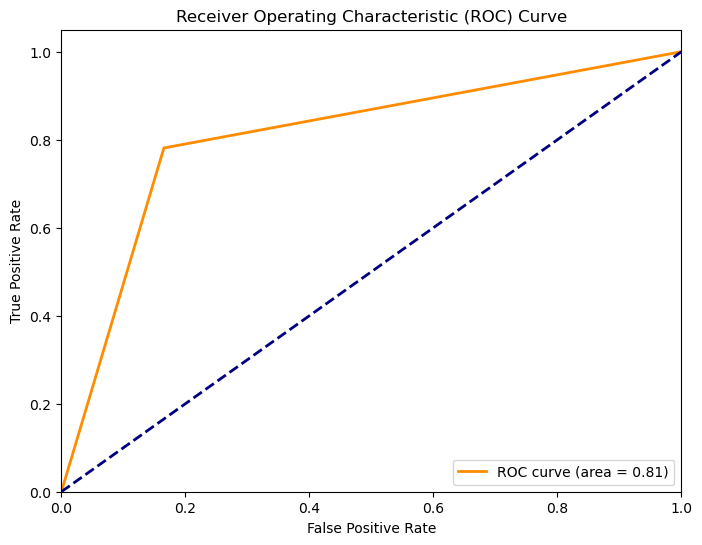

AUC (Area Under the Curve): 0.81


In [149]:
plot_roc_auc(y_test, y_pred_grid_svm_removed)

### Final Model predicted by GridSearchCV all features

In [150]:
svm_model_final=SVC()
svm_model_final.set_params(**best_params_grid_search_svm)

SVC(C=2, class_weight='balanced', gamma=0.3)

In [151]:
svm_model_final.fit(X_train, y_train)

SVC(C=2, class_weight='balanced', gamma=0.3)

In [152]:
y_pred_grid_svm_final = svm_model_final.predict(X_test)

In [153]:
confusion_matrix(y_test, y_pred_grid_svm_final)

array([[552,  59],
       [ 76, 244]], dtype=int64)

In [154]:
metrics = metrics_calculation(y_test,y_pred_grid_svm_final)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.81
Recall: 0.76
AUC: 0.83
F1 Score: 0.78
Accuracy: 0.85


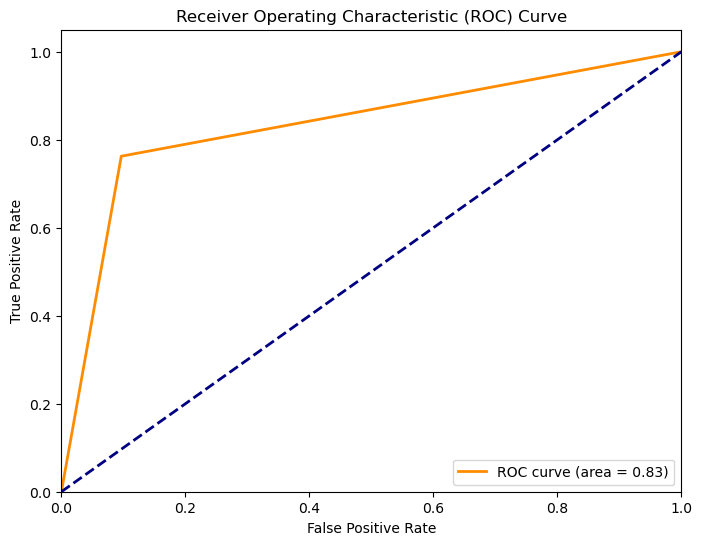

AUC (Area Under the Curve): 0.83


In [155]:
plot_roc_auc(y_test, y_pred_grid_svm_final)

In [156]:
final_scores.loc[len(final_scores)] = ['SVM Classifier',len(X_train.columns.to_list()),X_train.columns.to_list(),metrics['AUC'],metrics['Precision'],metrics['Recall'],metrics['Accuracy'],metrics['F1 Score']]

In [157]:
final_scores

Model Name  no of features  \
0  Logistic Regression  8                
1  Decision Tree        11               
2  SVM Classifier       12               

                                                                                                                                                                                     Features  \
0  [JoiningYear, PaymentTier, Age, Education_Masters, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]                                                                                  
1  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_Pune, Gender_Male, EverBenched_Yes]                   
2  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   

        AUC  Precision    Recall  Accuracy  F1 score  
0  0.664814  0.684729   0.434375  0.736842  0.531549  
1  0.818011  0.845865   0.703125  0.853921  0.767918  
2  0.832968  0.805281   0.762500  0.854995  0.783307

# SGD

### Baseline Model

In [158]:
columns = X_train.columns

In [159]:
columns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'Gender_Male',
       'EverBenched_Yes'],
      dtype='object')

In [160]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGD_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [161]:
predictions = SGD_model.predict(X_test)

In [162]:
confusion_matrix(y_test,predictions)

array([[534,  77],
       [187, 133]], dtype=int64)

In [163]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.63
Recall: 0.42
AUC: 0.64
F1 Score: 0.50
Accuracy: 0.72


### GridSearch on all features

In [164]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber','perceptron', 'squared_error', 'huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [500,1000, 2000],
    'random_state': [42],
}

In [165]:
grid_search_sgd = GridSearchCV(SGD_model, param_grid, cv=5, scoring='roc_auc')
grid_search_sgd.fit(X_train, y_train)

best_params_sgd = grid_search_sgd.best_params_
best_score_sgd = grid_search_sgd.best_score_

print(best_params_sgd,best_score_sgd)

{'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 500, 'penalty': 'l2', 'random_state': 42} 0.7310351212195976


In [166]:
SGD_model = SGDClassifier()

In [167]:
SGD_model.set_params(**best_params_sgd)

SGDClassifier(alpha=0.01, loss='log_loss', max_iter=500, random_state=42)

In [168]:
SGD_model.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', max_iter=500, random_state=42)

<AxesSubplot:ylabel='Feature'>

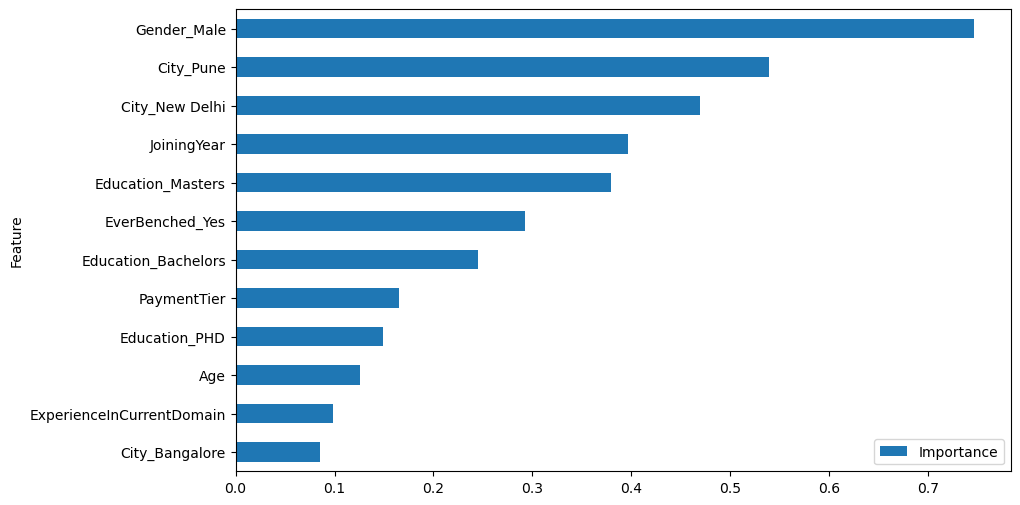

In [169]:
coefficients = SGD_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [170]:
feature_importance[feature_importance['Importance'] < 0.2]['Feature'].to_list()

['City_Bangalore',
 'ExperienceInCurrentDomain',
 'Age',
 'Education_PHD',
 'PaymentTier']

In [171]:
predictions = SGD_model.predict(X_test)

In [172]:
confusion_matrix(y_test,predictions)

array([[556,  55],
       [204, 116]], dtype=int64)

In [173]:
metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.68
Recall: 0.36
AUC: 0.64
F1 Score: 0.47
Accuracy: 0.72


### Grid Search on reduced features

In [174]:
feature_to_drop = feature_importance[feature_importance['Importance'] < 0.2]['Feature'].to_list()
X_train_new = X_train.drop(feature_to_drop,axis=1)
X_test_new  = X_test.drop(feature_to_drop,axis=1)

In [175]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber','perceptron', 'squared_error', 'huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [500,1000, 2000],
    'random_state': [42],
}

In [176]:
grid_search_sgd = GridSearchCV(SGD_model, param_grid, cv=5, scoring='roc_auc')
grid_search_sgd.fit(X_train_new, y_train)

best_params_sgd = grid_search_sgd.best_params_
best_score_sgd = grid_search_sgd.best_score_

print(best_params_sgd,best_score_sgd)

{'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 500, 'penalty': 'l2', 'random_state': 42} 0.7263006788433655


In [177]:
SGD_model.set_params(**best_params_sgd)

SGDClassifier(alpha=0.01, loss='log_loss', max_iter=500, random_state=42)

In [178]:
SGD_model.fit(X_train_new, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', max_iter=500, random_state=42)

<AxesSubplot:ylabel='Feature'>

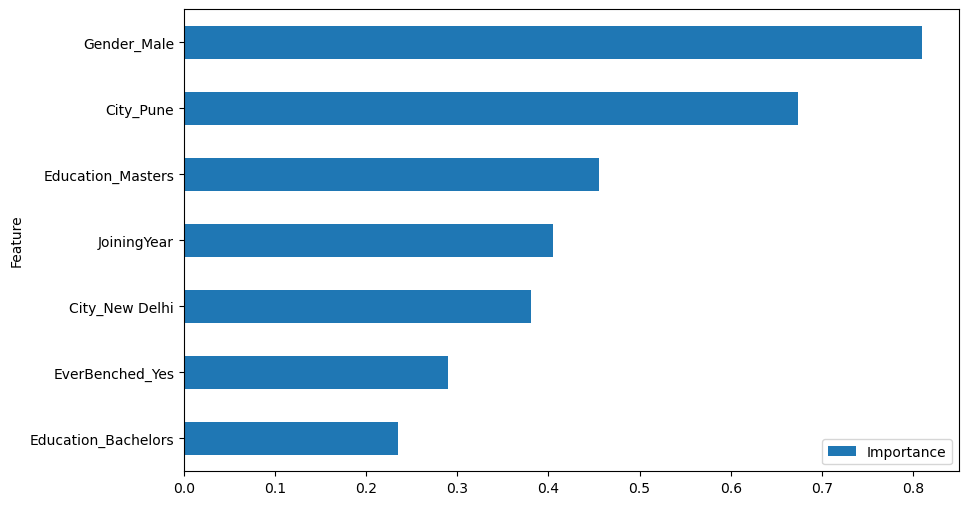

In [179]:
coefficients = SGD_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [180]:
predictions = SGD_model.predict(X_test_new)

In [181]:
accuracy_score(y_test,predictions)

0.7175080558539205

In [182]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       611
           1       0.67      0.35      0.46       320

    accuracy                           0.72       931
   macro avg       0.70      0.63      0.63       931
weighted avg       0.71      0.72      0.69       931



In [183]:
confusion_matrix(y_test,predictions)

array([[557,  54],
       [209, 111]], dtype=int64)

In [184]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.67
Recall: 0.35
AUC: 0.63
F1 Score: 0.46
Accuracy: 0.72


### Final SGD Model

In [185]:
# we could see the base model for SGD has better metrics so we are taking it as final model for SGD

In [186]:
SGD_model_final = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGD_model_final.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [187]:
predictions = SGD_model_final.predict(X_test)

In [188]:
confusion_matrix(y_test,predictions)

array([[534,  77],
       [187, 133]], dtype=int64)

In [189]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.63
Recall: 0.42
AUC: 0.64
F1 Score: 0.50
Accuracy: 0.72


In [190]:
final_scores.loc[len(final_scores)] = ['SGD Classifier',len(X_train.columns.to_list()),X_train.columns.to_list(),metrics['AUC'],metrics['Precision'],metrics['Recall'],metrics['Accuracy'],metrics['F1 Score']]

In [191]:
final_scores

Model Name  no of features  \
0  Logistic Regression  8                
1  Decision Tree        11               
2  SVM Classifier       12               
3  SGD Classifier       12               

                                                                                                                                                                                     Features  \
0  [JoiningYear, PaymentTier, Age, Education_Masters, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]                                                                                  
1  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_Pune, Gender_Male, EverBenched_Yes]                   
2  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   
3  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   

        AUC  Precision    Recall  Accuracy  F1 score  
0  0.664814  0.684729   0.434375  0.736842  0.531549  
1  0.818011  0.845865   0.703125  0.853921  0.767918  
2  0.832968  0.805281   0.762500  0.854995  0.783307  
3  0.644801  0.633333   0.415625  0.716434  0.501887

# Random Forest

### Base model

In [202]:
rfc_model = RandomForestClassifier(random_state=1234)
rfc_model.fit(X_train, y_train)
predictions = rfc_model.predict(X_test)

In [203]:
confusion_matrix(y_test,predictions)

array([[554,  57],
       [ 96, 224]], dtype=int64)

In [204]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.80
Recall: 0.70
AUC: 0.80
F1 Score: 0.75
Accuracy: 0.84


### GridSearch on all features

In [219]:
rfc_model_grid= RandomForestClassifier(random_state=1234)

In [220]:
param_grid = {
    'n_estimators': [ 100, 200,500,1000],            
    'criterion': ['gini', 'entropy'],             
    'max_depth': [None, 2,4,6,10],                         
    'max_features': ['auto', 'sqrt', 'log2'],    
    'bootstrap': [True, False]                   
}

In [221]:
grid_search_RFC = GridSearchCV(rfc_model_grid, param_grid, cv=3, scoring='roc_auc',verbose=1)
grid_search_RFC.fit(X_train, y_train)

best_params_RFC = grid_search_RFC.best_params_
best_score_RFC = grid_search_RFC.best_score_

print(best_params_RFC,best_score_RFC)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1000} 0.8731827060157701


In [222]:
rfc_model_grid.set_params(**best_params_RFC)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=1000, random_state=1234)

In [223]:
rfc_model_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=1000, random_state=1234)

<AxesSubplot:ylabel='Feature'>

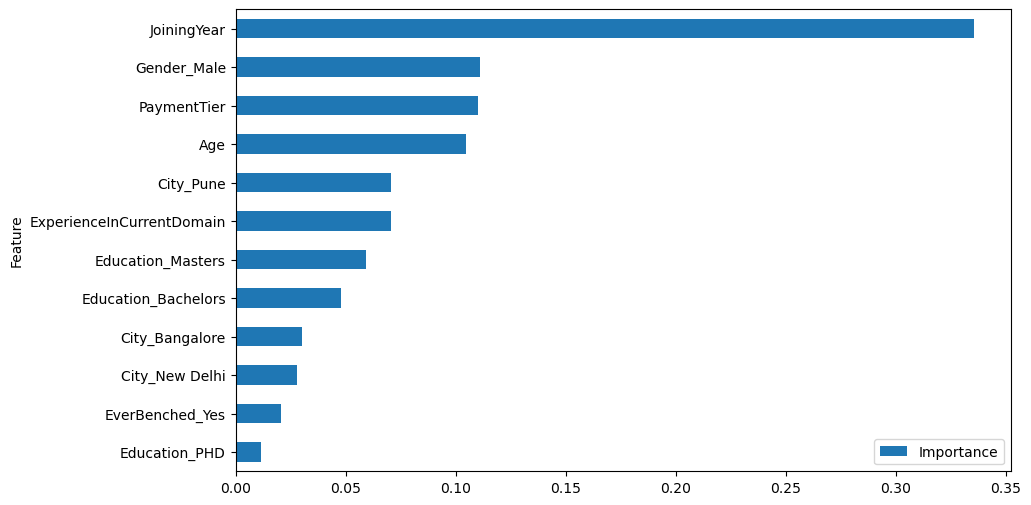

In [224]:
coefficients = rfc_model_grid.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [225]:
predictions = rfc_model_grid.predict(X_test)

In [226]:
confusion_matrix(y_test,predictions)

array([[578,  33],
       [ 96, 224]], dtype=int64)

In [227]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.87
Recall: 0.70
AUC: 0.82
F1 Score: 0.78
Accuracy: 0.86


### Grid Search on reduced features

In [231]:
feature_to_drop = feature_importance[feature_importance['Importance'] < 0.1]['Feature'].to_list()
X_train_new = X_train.drop(feature_to_drop,axis=1)
X_test_new  = X_test.drop(feature_to_drop,axis=1)

In [232]:
feature_to_drop

['Education_PHD',
 'EverBenched_Yes',
 'City_New Delhi',
 'City_Bangalore',
 'Education_Bachelors',
 'Education_Masters',
 'ExperienceInCurrentDomain',
 'City_Pune']

In [233]:
param_grid = {
    'n_estimators': [ 100, 200,500,1000],            
    'criterion': ['gini', 'entropy'],             
    'max_depth': [None, 2,4,6,10],                         
    'max_features': ['auto', 'sqrt', 'log2'],    
    'bootstrap': [True, False]                   
}

In [234]:
rfc_model_grid_reduced = RandomForestClassifier(random_state=1234)

In [235]:
grid_search_RFC_reduced = GridSearchCV(rfc_model_grid_reduced, param_grid, cv=3, scoring='roc_auc',verbose=1)
grid_search_RFC_reduced.fit(X_train_new, y_train)

best_params_RFC_reduced = grid_search_RFC_reduced.best_params_
best_score_RFC_reduced = grid_search_RFC_reduced.best_score_

print(best_params_RFC_reduced,best_score_RFC_reduced)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200} 0.7824536593585312


In [236]:
rfc_model_grid_reduced.set_params(**best_params_RFC_reduced)

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=200,
                       random_state=1234)

In [237]:
rfc_model_grid_reduced.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=200,
                       random_state=1234)

In [238]:
predictions = rfc_model_grid_reduced.predict(X_test_new)

In [239]:
accuracy_score(y_test,predictions)

0.8141783029001074

In [240]:
confusion_matrix(y_test,predictions)

array([[593,  18],
       [155, 165]], dtype=int64)

In [241]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.90
Recall: 0.52
AUC: 0.74
F1 Score: 0.66
Accuracy: 0.81


### Final Model for Random forest

In [242]:
rfc_model_final = RandomForestClassifier(random_state=1234)

In [243]:
best_params_RFC

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 1000}

In [244]:
rfc_model_final.set_params(**best_params_RFC)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=1000, random_state=1234)

In [245]:
rfc_model_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=1000, random_state=1234)

In [247]:
predictions = rfc_model_final.predict(X_test)

In [248]:
accuracy_score(y_test,predictions)

0.8614393125671321

In [249]:
confusion_matrix(y_test,predictions)

array([[578,  33],
       [ 96, 224]], dtype=int64)

In [250]:
metrics = metrics_calculation(y_test,predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.87
Recall: 0.70
AUC: 0.82
F1 Score: 0.78
Accuracy: 0.86


<AxesSubplot:ylabel='Feature'>

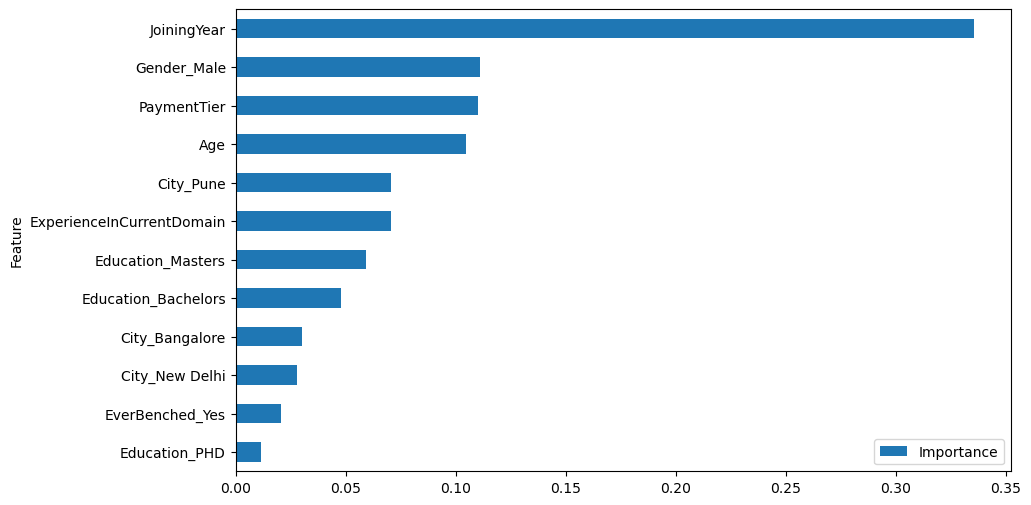

In [251]:
coefficients = rfc_model_final.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [252]:
final_scores.loc[len(final_scores)] = ['Random Forest Classifier',len(X_train.columns.to_list()),X_train.columns.to_list(),metrics['AUC'],metrics['Precision'],metrics['Recall'],metrics['Accuracy'],metrics['F1 Score']]

In [253]:
final_scores

Model Name  no of features  \
0  Logistic Regression       8                
1  Decision Tree             11               
2  SVM Classifier            12               
3  SGD Classifier            12               
4  Random Forest Classifier  12               

                                                                                                                                                                                     Features  \
0  [JoiningYear, PaymentTier, Age, Education_Masters, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]                                                                                  
1  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_Pune, Gender_Male, EverBenched_Yes]                   
2  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   
3  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   
4  [JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, Education_Bachelors, Education_Masters, Education_PHD, City_Bangalore, City_New Delhi, City_Pune, Gender_Male, EverBenched_Yes]   

        AUC  Precision    Recall  Accuracy  F1 score  
0  0.664814  0.684729   0.434375  0.736842  0.531549  
1  0.818011  0.845865   0.703125  0.853921  0.767918  
2  0.832968  0.805281   0.762500  0.854995  0.783307  
3  0.644801  0.633333   0.415625  0.716434  0.501887  
4  0.822995  0.871595   0.700000  0.861439  0.776430

In [264]:
final_scores.columns

Index(['Model Name', 'no of features', 'Features', 'AUC', 'Precision',
       'Recall', 'Accuracy', 'F1 score'],
      dtype='object')

In [265]:
final_scores.style.highlight_max(subset=['AUC', 'Precision',
       'Recall', 'Accuracy', 'F1 score'],color='lightgreen',axis=0)

# FINAL BEST MODEL

In [267]:
svm_model_final=SVC(probability=True)
svm_model_final.set_params(**best_params_grid_search_svm)

SVC(C=2, class_weight='balanced', gamma=0.3, probability=True)

In [268]:
svm_model_final.fit(X_train, y_train)

SVC(C=2, class_weight='balanced', gamma=0.3, probability=True)

In [269]:
y_pred_grid_svm_final = svm_model_final.predict(X_test)

In [270]:
confusion_matrix(y_test, y_pred_grid_svm_final)

array([[552,  59],
       [ 76, 244]], dtype=int64)

In [271]:
metrics = metrics_calculation(y_test,y_pred_grid_svm_final)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.81
Recall: 0.76
AUC: 0.83
F1 Score: 0.78
Accuracy: 0.85


In [272]:
train_svm_predictions = svm_model_final.predict(X_train)
train_svm_probs = svm_model_final.predict_proba(X_train)[:, 1]

svm_predictions = svm_model_final.predict(X_test)
svm_probs = svm_model_final.predict_proba(X_test)[:, 1]


print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_svm_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, svm_probs)}')

print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')


def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline pesvmormance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


Train ROC AUC Score: 0.8940515266687142
Test ROC AUC  Score: 0.8727470335515548
Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.76 Train: 0.75
Precision Baseline: 0.34 Test: 0.81 Train: 0.85
Roc Baseline: 0.5 Test: 0.87 Train: 0.89


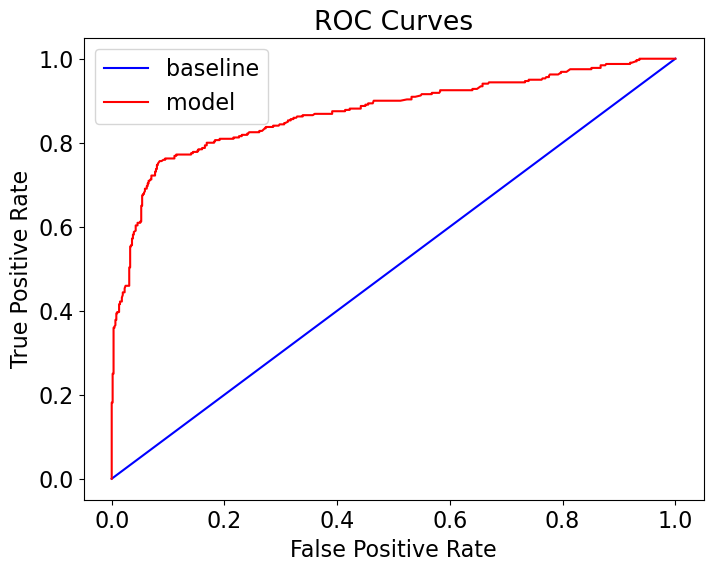

In [273]:
evaluate_model(svm_predictions, svm_probs, train_svm_predictions, train_svm_probs)

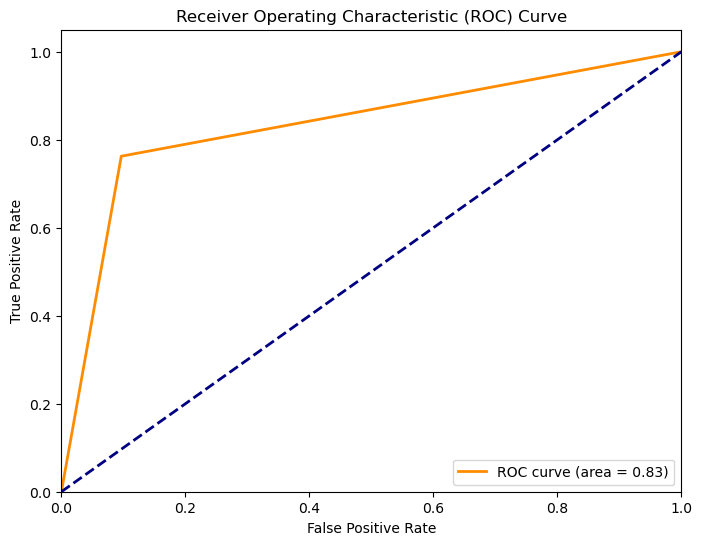

AUC (Area Under the Curve): 0.83


In [259]:
plot_roc_auc(y_test, y_pred_grid_svm_final)

In [260]:
#Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[552  59]
 [ 76 244]]


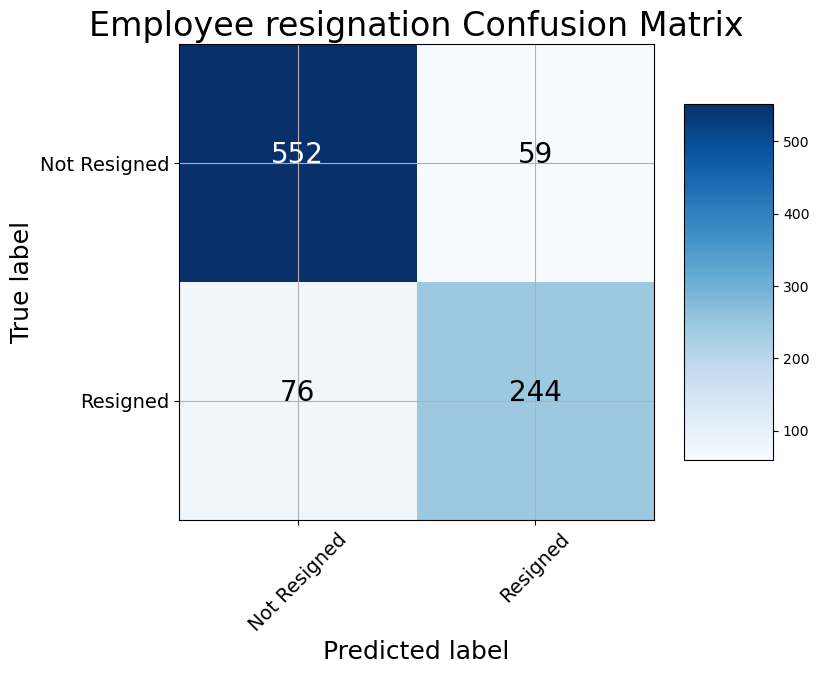

In [261]:
cm = confusion_matrix(y_test, y_pred_grid_svm_final)
plot_confusion_matrix(cm, classes = ['Not Resigned', 'Resigned'],
                      title = 'Employee resignation Confusion Matrix')